### Imports:

In [82]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_distribution

import matplotlib.pyplot as plt
import numpy as np

### Variables:

In [103]:
N_QUBITS = 2
n_shots = 100

### Prepare toymodel circuit:

We'll run circuit preparing Bell state. It entangles two qubits, that they are always measured in the same state. Check it!

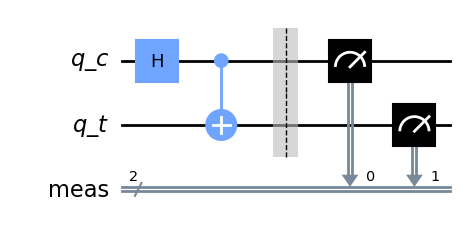

In [104]:
qr = [QuantumRegister(1, name='q_c'), QuantumRegister(1, name='q_t')]
qc = QuantumCircuit(*qr)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

qc.draw('mpl')

### Simulate it locally:

In [107]:
sampler = Sampler()
job = sampler.run(qc, shots=n_shots)
qp = job.result().quasi_dists[0]
print("Results:", qp)

Results: {0: 0.52, 3: 0.48}


### Plot distribution by built-in qiskit plotter:

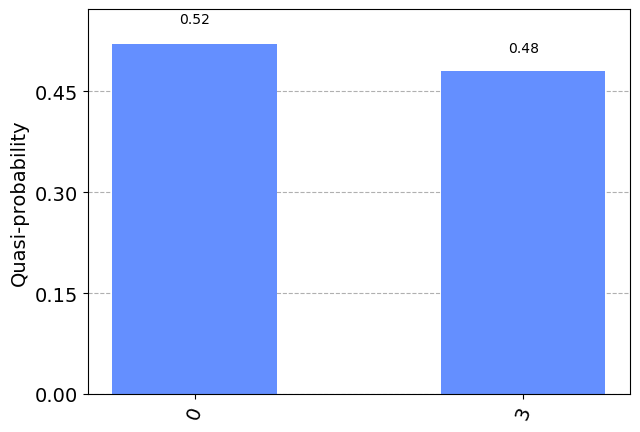

In [108]:
plot_distribution(qp)

### Plot distribution with matplotlib:

In [109]:
states_dec = np.array(list(qp.keys()))
quasi_probabilities = np.array(list(qp.values()))

states_bin_strings = [f"|{i:0>{N_QUBITS}b}⟩" for i in states_dec]

print("Measured states in decimal:\t", states_dec)
print("Measured states in binary:\t", states_bin_strings)
print("Respective quasi-probabilities:\t", quasi_probabilities)

Measured states in decimal:	 [0 3]
Measured states in binary:	 ['|00⟩', '|11⟩']
Respective quasi-probabilities:	 [0.52 0.48]


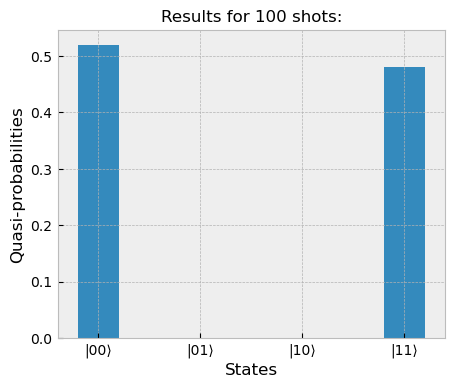

In [110]:
all_possible_states_strings = [f"|{i:0>{N_QUBITS}b}⟩" for i in range(2**N_QUBITS)]
with plt.style.context('bmh'):
    fig, axs = plt.subplots(1,1, figsize=(5,4))

    bars = plt.bar(states_dec, quasi_probabilities, width=0.4)
    plt.xlim(-0.4, 3.4)
    plt.xticks(range(2**N_QUBITS), ['|00⟩', '|01⟩', '|10⟩', '|11⟩'])
    plt.xlabel('States')
    plt.ylabel('Quasi-probabilities')
    plt.title(f'Results for {n_shots} shots:', fontsize=12)
    # plt.tight_layout()
    plt.show()